# Customer Personality Analysis


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_excel("marketing_campaign.xlsx")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# EDA

In [3]:
data.shape

(2240, 29)

In [4]:
#sum of the total expenses and total accepted campaign of each customers.
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data['Total_Acc_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [5]:
#checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
#checking for duplicate values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Total_Expenses          0
Total_Acc_Cmp           0
dtype: int64

No duplicate data because each 2240 ID is unique.

In [7]:
data['Age'] = 2015 - data['Year_Birth']

In [8]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [9]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_Expenses,Total_Acc_Cmp,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,1617,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,27,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,776,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,53,0,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,422,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,3,11,0,1341,0,48
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,3,11,0,444,1,69
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,3,11,0,1241,1,34
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,3,11,0,843,0,59


# Data Visualization

Text(0.5, 1.0, 'Age')

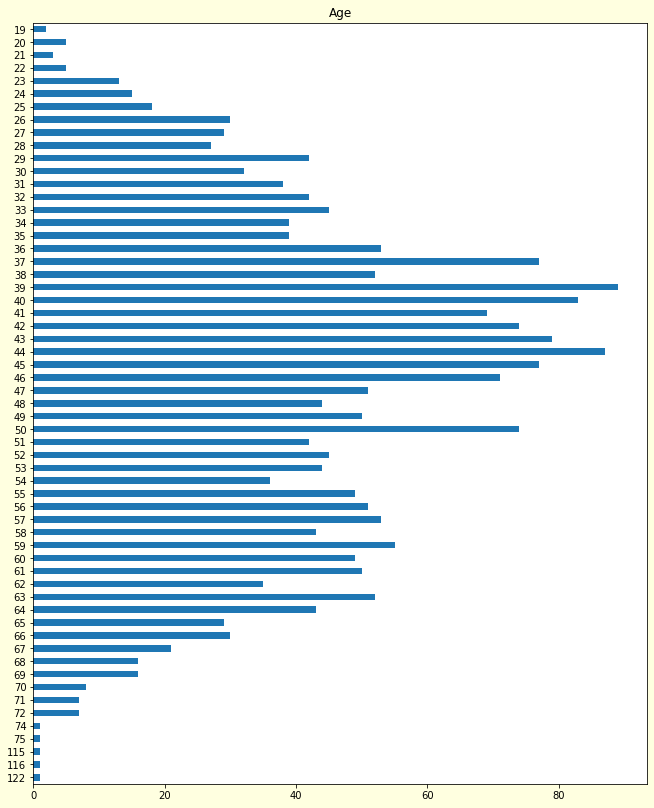

In [10]:
plt.figure(figsize=(11,14), facecolor='lightyellow')
data['Age'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Age')

The age graph shows that the majority of clients are between the ages of 43 and 56.

Text(0.5, 1.0, 'Income')

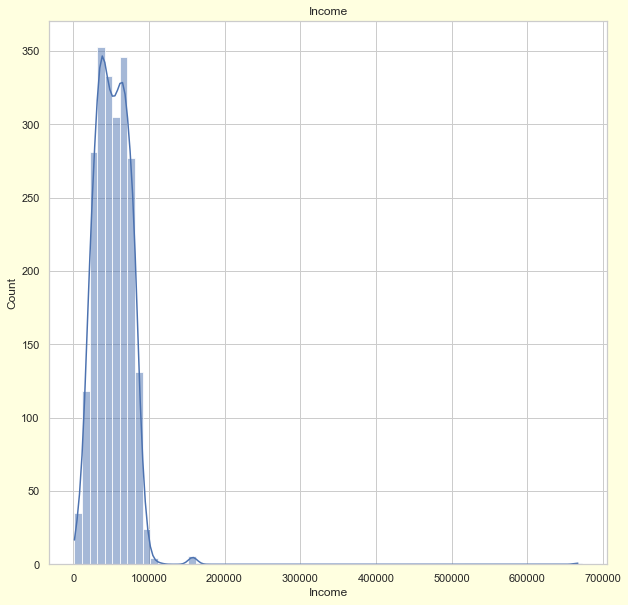

In [11]:
plt.figure(figsize=(10,10), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.histplot(data=data, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

The income graph shows that the majority of the clients have incomes between $30,000 and $800,000.

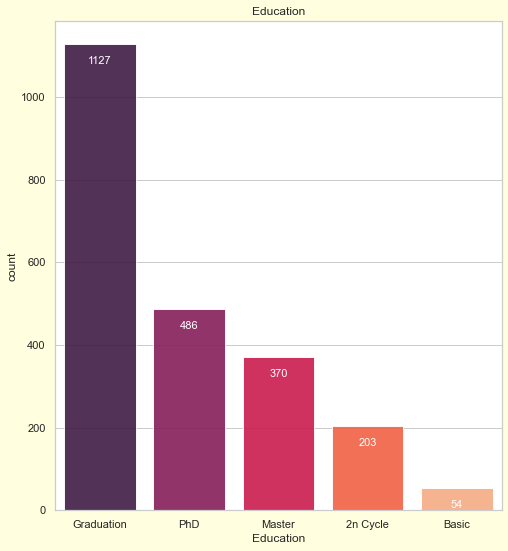

In [12]:
plt.figure(figsize=(8, 9), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Education', saturation=1, alpha=0.9, palette='rocket', order=data['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
 ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

The majority of clients come from graduate-level educational backgrounds, according to the education graph.

Text(0, 5, '2')

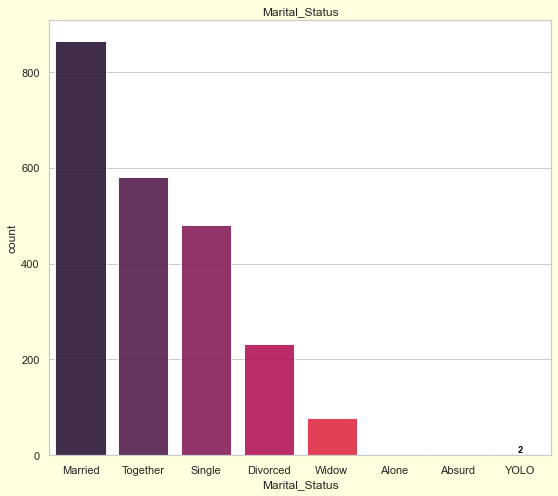

In [13]:
plt.figure(figsize=(9, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=data['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

The graph of marital status shows that the majority of consumers are already married.

Text(0, 5, '48')

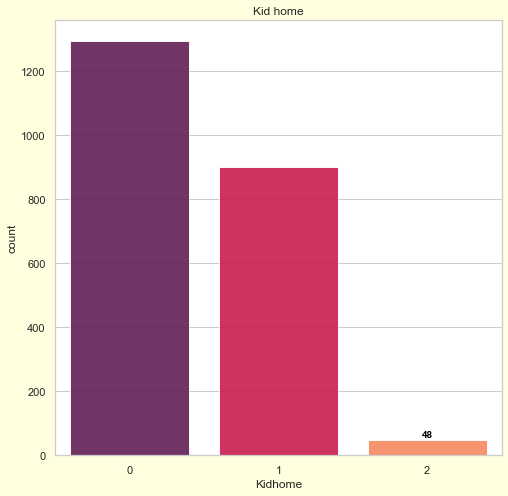

In [14]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Kidhome', saturation=1, alpha=0.9, palette='rocket', order=data['Kidhome'].value_counts().index)
ax.set_title('Kid home')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

Text(0, 5, '52')

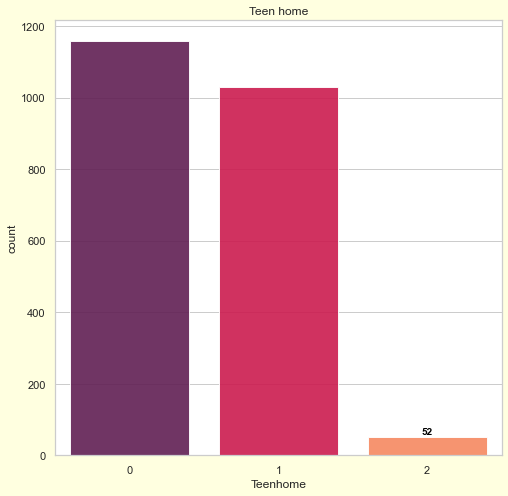

In [15]:
plt.figure(figsize=(8, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=data, x='Teenhome', saturation=1, alpha=0.9, palette='rocket', order=data['Teenhome'].value_counts().index)
ax.set_title('Teen home')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=10)

Text(-49, 0, '680816')

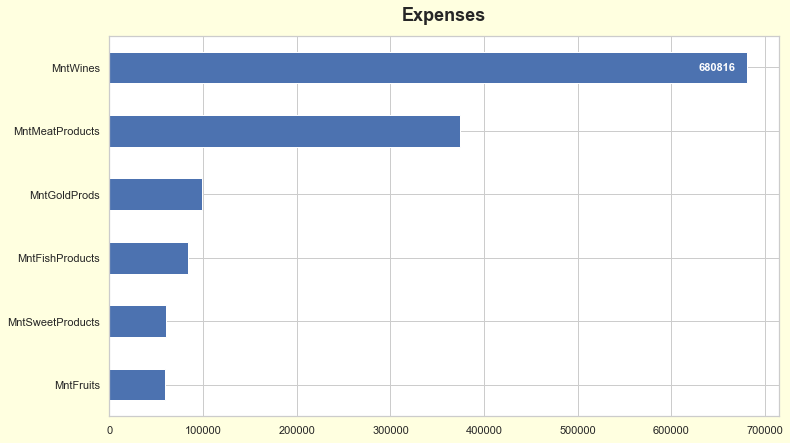

In [16]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
 x_value = rect.get_width()
 y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

Wine has the largest sell amount as seen by the graph of total expenses.

<AxesSubplot:>

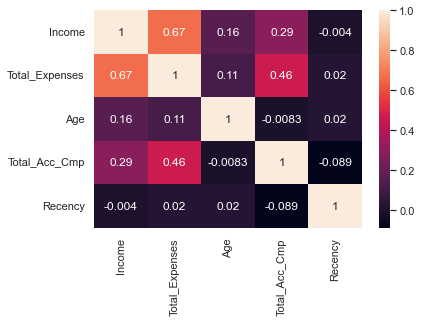

In [17]:
sns.heatmap(data[['Income', 'Total_Expenses','Age', 'Total_Acc_Cmp', 'Recency']].corr(), annot=True)


Thus, age, total accepted campaigns, total expenses, revenue, and recency are correlated with each other. Income and total expenditures have the strongest link, followed by expenditures and the total number of campaigns that were accepted.

# Feature Engineering


In [18]:
data['Income'].fillna(data['Income'].mean(), inplace=True)


In [19]:
from sklearn.preprocessing import StandardScaler
from scipy import stats
from datetime import timedelta

# Removing Outliers

In [20]:
numerical = ['Income', 'Recency', 'Age']

In [21]:
def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(data[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = data[i][(data[i] > ul) | (data[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [22]:
detect_outliers(numerical)

*** Income outlier points*** 
 164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64 

*** Recency outlier points*** 
 Series([], Name: Recency, dtype: int64) 

*** Age outlier points*** 
 192    115
239    122
339    116
Name: Age, dtype: int64 



In [23]:
data = data[(data['Age']<100)]
data = data[(data['Income']<660000)]

In [24]:
data.shape

(2236, 32)

In [25]:
data_prep = data.copy()

In [26]:
# label encoding on marital status and ordinal encoding for education
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
lenc.fit(data_prep['Marital_Status'])
data_prep['Marital_Status'] = lenc.transform(data_prep['Marital_Status'])
from sklearn.preprocessing import OrdinalEncoder
edu = ['Basic', 'Graduation', 'Master', '2n Cycle', 'PhD']
ore = OrdinalEncoder(categories=([edu]))
ore.fit(data_prep[['Education']])
data_prep['Education'] = ore.transform(data_prep[['Education']])

In [27]:
#dropping features that I’m no longer going to need 
data_prep = data_prep.drop(['ID', 'Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response', 'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [28]:
data_prep

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Expenses,Total_Acc_Cmp,Age
0,1.0,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,1,58
1,1.0,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,61
2,1.0,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,0,50
3,1.0,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,0,31
4,4.0,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.0,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,1341,0,48
2236,4.0,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,444,1,69
2237,1.0,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1241,1,34
2238,2.0,5,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,843,0,59


In [29]:
scaler = StandardScaler()
data_prep1 = pd.DataFrame(scaler.fit_transform(data_prep), columns = data_prep.columns)

In [30]:
data_prep1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Expenses,Total_Acc_Cmp,Age
0,-0.778857,0.251533,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,1.680176,0.620456,1.016868
1,-0.778857,0.251533,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.962202,-0.501987,1.273264
2,-0.778857,1.181168,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,0.282541,-0.501987,0.333146
3,-0.778857,1.181168,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.918994,-0.501987,-1.290693
4,1.625456,-0.678101,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.305762,-0.501987,-1.034298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.778857,-0.678101,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,2.201960,3.900428,-0.168700,1.767433,0.115201,-0.552429,-0.131421,1.221499,-0.501987,0.162216
2232,1.625456,1.181168,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,-0.691317,2.418490,1.407639,-0.226884,-0.244775,0.692865,-0.269201,0.620456,1.956986
2233,-0.778857,-1.607735,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,-0.365231,-0.383920,-0.686137,-0.751127,0.115201,2.216459,0.280722,1.055312,0.620456,-1.034298
2234,0.022581,1.181168,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,0.070707,0.326936,-0.168700,0.688050,0.799373,1.293496,-0.955707,0.393886,-0.501987,1.102333


In [31]:
final_data = data_prep1.copy()

In [32]:
final_data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Expenses,Total_Acc_Cmp,Age
0,-0.778857,0.251533,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,1.680176,0.620456,1.016868
1,-0.778857,0.251533,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.962202,-0.501987,1.273264
2,-0.778857,1.181168,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,0.282541,-0.501987,0.333146
3,-0.778857,1.181168,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.918994,-0.501987,-1.290693
4,1.625456,-0.678101,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.305762,-0.501987,-1.034298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.778857,-0.678101,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,2.201960,3.900428,-0.168700,1.767433,0.115201,-0.552429,-0.131421,1.221499,-0.501987,0.162216
2232,1.625456,1.181168,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,-0.655857,-0.691317,2.418490,1.407639,-0.226884,-0.244775,0.692865,-0.269201,0.620456,1.956986
2233,-0.778857,-1.607735,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,-0.365231,-0.383920,-0.686137,-0.751127,0.115201,2.216459,0.280722,1.055312,0.620456,-1.034298
2234,0.022581,1.181168,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,0.070707,0.326936,-0.168700,0.688050,0.799373,1.293496,-0.955707,0.393886,-0.501987,1.102333


# PCA

In [33]:
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components=3) # just 3 columns
pca.fit(final_data)

PCA(n_components=3)

In [35]:
x_pca = pca.fit_transform(final_data)

In [36]:
print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ", sum(pca.explained_variance_ratio_))

variance ratio:  [0.36406422 0.09960418 0.06634413]
sum:  0.5300125282494287


In [37]:
PCA_ds = pd.DataFrame(pca.transform(final_data), columns=["col1", "col2", "col3"])
PCA_ds

,col1,col2,col3
0,4.196067,-0.283494,1.458899
1,-2.528041,0.181363,-1.090451
2,1.810016,-0.335205,-0.141768
3,-2.734490,-1.523703,0.647080
4,-0.403484,-0.019193,0.642623
...,...,...,...
2231,2.813620,1.091029,1.781561
2232,-1.294963,3.436414,0.030110
2233,1.695758,-0.825088,0.535123
2234,1.997375,1.094560,-1.158112


In [38]:
x1 = PCA_ds["col1"]
x2 = PCA_ds["col2"]
x3 = PCA_ds["col3"]

In [39]:
from mpl_toolkits.mplot3d import Axes3D

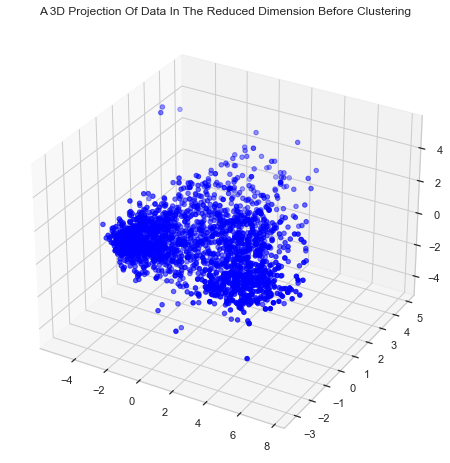

In [40]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x1,x2,x3, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension Before Clustering")
plt.show()

# Clustering

# KMeans clustering

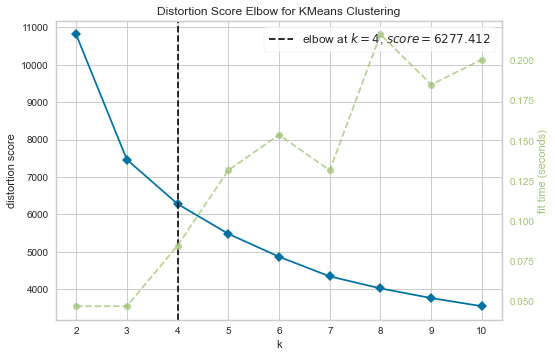

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(PCA_ds)
elbow.show()

# Agglomerative Clustering

In [42]:
from sklearn.cluster import AgglomerativeClustering

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=AgglomerativeClustering(n_clusters=8), k=(3, 9),
                 timings=False)

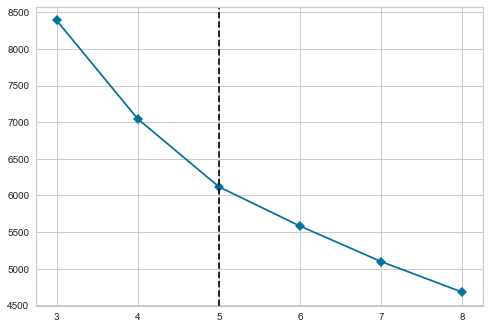

In [43]:
# Create Agglomerative Clustering model
model = AgglomerativeClustering()

# Use the KElbowVisualizer with silhouette score
visualizer = KElbowVisualizer(model, k=(3,9), timings=False)
visualizer.fit(PCA_ds)

In [44]:
# Display the elbow visualization
visualizer.show()

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
agloCluster = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(PCA_ds)

In [46]:
# evaluate the model using silhouette_score and distorion score
from sklearn.metrics import silhouette_score, calinski_harabasz_score

print('Silhouette Score: ', silhouette_score(PCA_ds, agloCluster.labels_))

Silhouette Score:  0.30472548035751695


The above cell indicates that four will be an optimal number of clusters for this data.
Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [47]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
final_data["Clusters"]= yhat_AC
data_prep["Clusters"]= yhat_AC

In [48]:
PCA_ds

,col1,col2,col3,Clusters
0,4.196067,-0.283494,1.458899,1
1,-2.528041,0.181363,-1.090451,0
2,1.810016,-0.335205,-0.141768,2
3,-2.734490,-1.523703,0.647080,3
4,-0.403484,-0.019193,0.642623,2
...,...,...,...,...
2231,2.813620,1.091029,1.781561,1
2232,-1.294963,3.436414,0.030110,2
2233,1.695758,-0.825088,0.535123,2
2234,1.997375,1.094560,-1.158112,2


In [49]:
final_data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Expenses,Total_Acc_Cmp,Age,Clusters
0,-0.778857,0.251533,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,1.680176,0.620456,1.016868,1
1,-0.778857,0.251533,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.962202,-0.501987,1.273264,0
2,-0.778857,1.181168,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,0.282541,-0.501987,0.333146,2
3,-0.778857,1.181168,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.918994,-0.501987,-1.290693,3
4,1.625456,-0.678101,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.305762,-0.501987,-1.034298,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,-0.778857,-0.678101,0.432628,-0.824939,0.905974,-0.107640,1.203128,0.421101,0.066551,0.081700,...,3.900428,-0.168700,1.767433,0.115201,-0.552429,-0.131421,1.221499,-0.501987,0.162216,1
2232,1.625456,1.181168,0.563008,2.890194,0.905974,0.237773,0.302727,-0.661610,-0.607091,-0.687019,...,-0.691317,2.418490,1.407639,-0.226884,-0.244775,0.692865,-0.269201,0.620456,1.956986,2
2233,-0.778857,-1.607735,0.234465,-0.824939,-0.930615,1.446720,1.794481,0.546997,0.221666,-0.101329,...,-0.383920,-0.686137,-0.751127,0.115201,2.216459,0.280722,1.055312,0.620456,-1.034298,2
2234,0.022581,1.181168,0.807372,-0.824939,0.905974,-1.420212,0.368102,0.093769,0.208371,0.777208,...,0.326936,-0.168700,0.688050,0.799373,1.293496,-0.955707,0.393886,-0.501987,1.102333,2


In [50]:
final_data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Expenses,Total_Acc_Cmp,Age,Clusters
0,-0.778857,0.251533,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,...,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,1.680176,0.620456,1.016868,1
1,-0.778857,0.251533,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,...,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-0.962202,-0.501987,1.273264,0
2,-0.778857,1.181168,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,...,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,0.282541,-0.501987,0.333146,2
3,-0.778857,1.181168,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,...,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-0.918994,-0.501987,-1.290693,3
4,1.625456,-0.678101,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,...,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.305762,-0.501987,-1.034298,2


Now in the above data frame clusters are added as the last columns

In [51]:
# create a countplot
print('Cluster Count:')
print(final_data['Clusters'].value_counts())

Cluster Count:
3    687
1    583
0    497
2    469
Name: Clusters, dtype: int64


In [52]:
final_data.groupby(['Clusters']).mean()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Expenses,Total_Acc_Cmp,Age
Clusters,,,,,,,,,,,,,,,,,,,,
0,0.170935,0.075707,-0.292710,0.318754,0.754465,0.018779,-0.532156,-0.507039,-0.541790,-0.518501,-0.493440,-0.321064,0.471591,-0.255233,-0.531802,-0.472575,0.312234,-0.642945,-0.273885,0.456099
1,-0.079145,0.018726,1.095298,-0.748470,-0.574638,0.008189,0.914509,1.077275,1.267219,1.097680,1.045482,0.684621,-0.486440,0.422679,1.108013,0.828585,-0.996709,1.288353,0.581951,0.025442
2,0.292575,0.001781,0.404734,-0.567494,0.729756,0.031630,0.629098,-0.023323,-0.056057,-0.015902,-0.006700,0.306331,0.486648,0.845316,0.308491,0.705739,0.061908,0.353856,0.002993,0.435377
3,-0.256231,-0.071876,-0.994035,0.791982,-0.556347,-0.042128,-0.820559,-0.531462,-0.645165,-0.545552,-0.525668,-0.557838,-0.260588,-0.751127,-0.766155,-0.843066,0.577681,-0.869759,-0.297758,-0.648771


# Hierarchial Clustering

In [53]:
from scipy.cluster.hierarchy import linkage, dendrogram

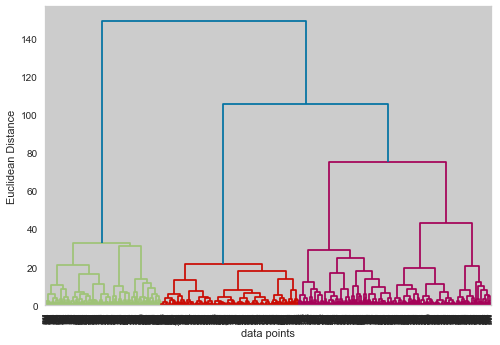

In [54]:
merg = linkage(PCA_ds, method="ward")
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("Euclidean Distance")
plt.show()

Here also we can see 4 clusters

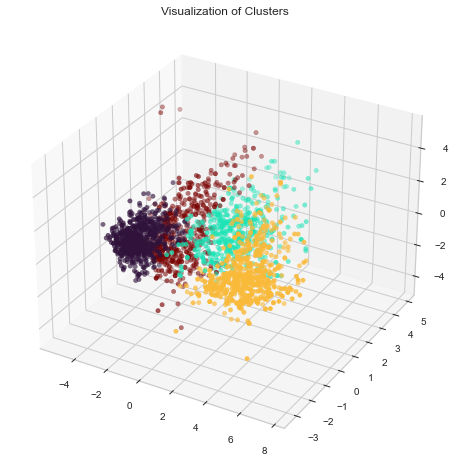

In [55]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x1,x2,x3, c=yhat_AC, marker="o", cmap="turbo_r")
ax.set_title("Visualization of Clusters")
plt.show()

# DBscan clustering

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
# Set the epsilon (eps) and minimum samples (min_samples) for DBSCAN
eps = 0.5  # Radius within which to search for neighboring points
min_samples = 5  # Minimum number of points required to form a dense region

In [58]:
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(PCA_ds)

In [59]:
# Print cluster assignments (-1 for noise points)
print("Cluster Assignments:")
print(labels)

Cluster Assignments:
[ 3  0  2 ... 16  2  0]


In [60]:
PCA_ds

,col1,col2,col3,Clusters
0,4.196067,-0.283494,1.458899,1
1,-2.528041,0.181363,-1.090451,0
2,1.810016,-0.335205,-0.141768,2
3,-2.734490,-1.523703,0.647080,3
4,-0.403484,-0.019193,0.642623,2
...,...,...,...,...
2231,2.813620,1.091029,1.781561,1
2232,-1.294963,3.436414,0.030110,2
2233,1.695758,-0.825088,0.535123,2
2234,1.997375,1.094560,-1.158112,2


# Model building and Model Evaluation

In [61]:
data_prep

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Expenses,Total_Acc_Cmp,Age,Clusters
0,1.0,4,58138.0,0,0,58,635,88,546,172,...,88,3,8,10,4,7,1617,1,58,1
1,1.0,4,46344.0,1,1,38,11,1,6,2,...,6,2,1,1,2,5,27,0,61,0
2,1.0,5,71613.0,0,0,26,426,49,127,111,...,42,1,8,2,10,4,776,0,50,2
3,1.0,5,26646.0,1,0,26,11,4,20,10,...,5,2,2,0,4,6,53,0,31,3
4,4.0,3,58293.0,1,0,94,173,43,118,46,...,15,5,5,3,6,5,422,0,34,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.0,3,61223.0,0,1,46,709,43,182,42,...,247,2,9,3,4,5,1341,0,48,1
2236,4.0,5,64014.0,2,1,56,406,0,30,0,...,8,7,8,2,5,7,444,1,69,2
2237,1.0,2,56981.0,0,0,91,908,48,217,32,...,24,1,2,3,13,6,1241,1,34,2
2238,2.0,5,69245.0,0,1,8,428,30,214,80,...,61,2,6,5,10,3,843,0,59,2


In [62]:
model_data = data_prep.copy()

In [63]:
X = model_data.iloc[:,0:20]
Y = model_data.iloc[:,20]

In [64]:
X

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Total_Expenses,Total_Acc_Cmp,Age
0,1.0,4,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,1617,1,58
1,1.0,4,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,27,0,61
2,1.0,5,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,776,0,50
3,1.0,5,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,53,0,31
4,4.0,3,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,422,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.0,3,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,1341,0,48
2236,4.0,5,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,444,1,69
2237,1.0,2,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,1241,1,34
2238,2.0,5,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,843,0,59


In [65]:
Y

0       1
1       0
2       2
3       3
4       2
       ..
2235    1
2236    2
2237    2
2238    2
2239    0
Name: Clusters, Length: 2236, dtype: int64

# Random Forest

In [66]:
from sklearn.ensemble import  RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree

In [67]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.20,stratify = Y) 

In [68]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.9151785714285714


In [69]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        99
           1       0.94      0.94      0.94       117
           2       0.86      0.89      0.88        94
           3       0.96      0.93      0.94       138

    accuracy                           0.92       448
   macro avg       0.91      0.91      0.91       448
weighted avg       0.92      0.92      0.92       448



In [70]:
confusion_matrix(y_test,pred)

array([[ 88,   0,   6,   5],
       [  0, 110,   7,   0],
       [  3,   7,  84,   0],
       [  9,   0,   1, 128]], dtype=int64)

The Random forest has 0.9263392857142857 accuracy

# Model Deployement

In [71]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

In [72]:
%%writefile mod.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()

# defining the function which will make the prediction using the data which the user inputs 
def prediction(Education, Marital_Status, DOB,Incomes,Kidhome,Teenhome,Purchases,Expense,Recency,Campaign,Complain, Response):   
 
    # Pre-processing user input    
    
    if Education == "Basic":
        Education = 0
        
    elif Education == "Graduated":
        Education = 1
        
    elif Education == "PHD":
        Education = 2
#*****************************************#      
    if Marital_Status == "Single":
        Marital_Status = 0
    
    elif Marital_Status == "Relationship":
        Marital_Status = 1
#*****************************************#        
    if Incomes == "Below 25000":
        Incomes = 1
    
    elif Incomes == "Income 25000-50000":
        Incomes = 2
        
    elif Incomes == "Income 50000-100000":
        Incomes = 3
        
    elif Incomes == "Above 100000":
        Incomes = 0
        

#*****************************************# 

    if Campaign == "Accepted 0 Campaign":
        Campaign = 0
    
    elif Campaign == "Accepted 1 Campaign":
        Campaign = 1
        
    elif Campaign == "Accepted 2 Campaign":
        Campaign = 2
        
    elif Campaign == "Accepted 3 Campaign":
        Campaign = 3  
        
    elif Campaign == "Accepted 4 Campaign":
        Campaign = 4
        


#*****************************************#    
    if Response == "YES":
        Response = 1
    
    elif Response == "NO":
        Response = 0

#*****************************************#      
    if Complain == "YES":
        Complain = 1
    
    elif Complain == "NO":
        Complain = 0
  #*****************************************#     

  #*****************************************# 
        
        
    prediction = classifier.predict( 
        [[Education, Marital_Status,DOB, Incomes, Kidhome,Teenhome,Purchases,Expense,Recency,Campaign,Complain, Response]])
            
    if prediction == 0:
        pred = 'cluster 0'
   
    elif prediction == 1:
        pred = 'cluster 1'
    
    elif prediction == 2:
        pred = 'cluster 2'
        
    elif prediction == 3:
        pred = 'cluster 3'
    
    return pred
   
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:Orange;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Model Deployment</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
    
    # following lines create boxes in which user can enter data required to make prediction 
    
    Education = st.selectbox("Education",("Basic","Graduated","PHD"))
    
    Marital_Status = st.radio("Marital_Status: ", ('Single', 'Relationship'))
    if (Marital_Status == 'Single'):
        st.success("Single")
    elif (Marital_Status == 'Relationship'):
        st.success("Relationship")
    
    DOB = st.slider("Select DOB", 1930, 2021)
    st.text('Selected: {}'.format(DOB)) 
    
    Incomes = st.selectbox("Incomes",("Below 25000", "Income 25000-50000", "Income 50000-100000","Above 100000")) 
   
    Kidhome = st.text_input("Kidhome")
    
    Teenhome = st.text_input("Teenhome") 
    
    Purchases= st.slider("NUmber of Purchase Made", 0, 50)
    st.text('Selected: {}'.format(Purchases)) 
    
    Expense = st.slider("Select Monthly Expense", 0, 3000)
    st.text('Selected: {}'.format(Expense)) 
    
    Recency= st.slider("last Purchase", 0, 100)
    st.text('Selected: {}'.format(Recency)) 

    Campaign =st.selectbox("Campaign",("Accepted 0 Campaign","Accepted 1 Campaign","Accepted 2 Campaign","Accepted 3 Campaign","Accepted 4 Campaign"))
    
    Complain = st.selectbox("Complain",("YES","NO"))
    
    Response = st.selectbox("Accepted the offer in the last campaign",("YES","NO"))
    
    result =""
          
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Education, Marital_Status,DOB, Incomes, Kidhome,Teenhome,Purchases,Expense,Recency, Campaign,Complain, Response) 
        st.success('Common cluster is {}'.format(result))
   
     
if __name__=='__main__': 
    main()

Overwriting mod.py
